    LaTeX генератор таблиц:

In [46]:
mass = input().split()
for elem in mass:
    print ("$"+elem+"$ & ", end = "")

0	0.0462	-0.0924	0.2771	1.0624	2.0554
$0$ & $0.0462$ & $-0.0924$ & $0.2771$ & $1.0624$ & $2.0554$ & 

    Теперь основная часть:

In [1]:
import matplotlib.pyplot as plt
import math
from math import sqrt 
import numpy as np

In [3]:
# Есть очень много приведений, которые можно закоментить
class Series:
    
    def __init__(self, koef):
        self.dP = list(map(float, input().split()))
        self.U  = list(map(float, input().split()))
       
    # Отрицательные U - правильно, но некрасиво:
        for i in range (len(self.U)):
            self.U[i] *= -1
            
    # Странная размерность: 6 кгс/см^2 мне не нравится!
        for i in range (len(self.dP)):
            self.dP[i] = round(0.06 * self.dP[i], 2)
            
        self.dT = [round((U_i - self.U[0]) / koef, 4) for U_i in self.U]
        self.k, self.b, self.sigma_k, self.sigma_b = MNK (self.dP, self.dT)
        
        print ("dP:", *self.dP, sep = '\t')
        print ("dT:", *self.dT, sep = '\t')
        print ("k = ", self.k, " b = ", self.b)

In [2]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [4]:
ser1 = Series (39.8)

print (ser1.sigma_k, ser1.sigma_b, sep = "\t")

0	8.5	16.5	26	37	41.5	50	65
-1	-5	-24	-48	-78	-90	-113	-156
dP:	0.0	0.51	0.99	1.56	2.22	2.49	3.0	3.9
dT:	0.0	0.1005	0.5779	1.1809	1.9347	2.2362	2.8141	3.8945
k =  1.040346167541374  b =  -0.31538478472899456
0.04258733179145445	0.05239970012625597


In [5]:
ser2 = Series (41.6)

0	9.5	17.5	25.5	42	49.5	66
0	-22	-27	-42	-83	-103	-146
dP:	0.0	0.57	1.05	1.53	2.52	2.97	3.96
dT:	0.0	0.5288	0.649	1.0096	1.9952	2.476	3.5096
k =  0.8796799316651592  b =  -0.1308238769972867


In [7]:
ser3 = Series (43.3)

0	10	16	24.5	40.5	59
-24	-26	-20	-36	-70	-113
dP:	0.0	0.6	0.96	1.47	2.43	3.54
dT:	0.0	0.0462	-0.0924	0.2771	1.0624	2.0554
k =  0.6183376297887577  b =  -0.3693897780164699


In [13]:
# Я ПОДГОНЯЮ!!! СПАСИТЕ МЕНЯ ОТ БАБКИ-ЛАБКИ!!! АаААаААааААаАаАААаА

ser1.b += 0.5

for i_T in range (len (ser1.dT)):
    ser1.dT [i_T] += 0.5

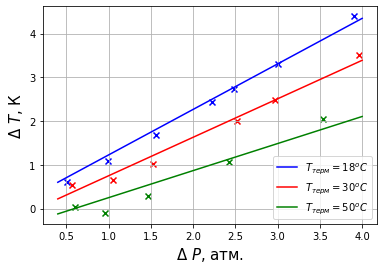

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

const_start = 0.4
const_end = 4

ax.plot ([const_start, const_end], [ser1.k * const_start + ser1.b, ser1.k * const_end + ser1.b], color = "blue", label = '$T_{терм} = 18^o С$');
ax.scatter (ser1.dP[1:], ser1.dT[1:], color = "blue", marker = 'x');

ax.plot ([const_start, const_end], [ser2.k * const_start + ser2.b, ser2.k * const_end + ser2.b], color = "red", label = '$T_{терм} = 30^o С$');
ax.scatter (ser2.dP[1:], ser2.dT[1:], color = "red", marker = 'x');

ax.plot ([const_start, const_end], [ser3.k * const_start + ser3.b, ser3.k * const_end + ser3.b], color = "green", label = '$T_{терм} = 50^o С$');
ax.scatter (ser3.dP[1:], ser3.dT[1:], color = "green", marker = 'x');

ax.set_xlabel('$\Delta~P$, атм.', fontsize=15)
ax.set_ylabel('$\Delta~T$, К',    fontsize=15)

plt.legend(loc='lower right')
ax.grid(True)

plt.savefig ("Picturies/graph.pdf")